## RNN con California Housing

## Librerias

In [2]:
#tratamiento de datos
import numpy as np
import pandas as pd

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# modelo de arendizaje
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score, root_mean_squared_error,mean_absolute_percentage_error
from sklearn.datasets import fetch_california_housing

# redes neuronales
import tensorflow as tf
from tensorflow import keras
from keras import layers

## Descarga y carga de datos

In [3]:
housing = fetch_california_housing()
X = housing.data
y = housing.target 

features_names = housing.feature_names

## Crear un DF

In [3]:
df = pd.DataFrame(X, columns=features_names)

df['target'] = y

## Primera Exploración 

In [4]:
print(f"Tamaño de el dataset {df.shape}")
print("\nInformación de las columnas :")
print(df.info())
print("\nEstadisticas discriptivas :")
print(df.describe())

Tamaño de el dataset (20640, 9)

Información de las columnas :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estadisticas discriptivas :
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   113

- problema de regresion, por tanto veamos si la target es normal

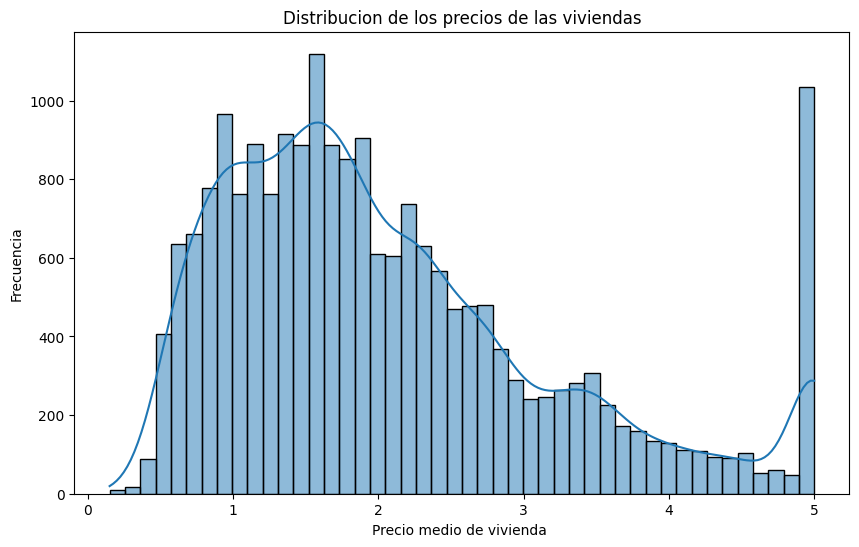

In [5]:
# Visualizacion de la Distribución de precios
plt.figure(figsize=(10,6))
sns.histplot(df['target'], kde=True)
plt.title('Distribucion de los precios de las viviendas')
plt.xlabel('Precio medio de vivienda ')
plt.ylabel('Frecuencia');

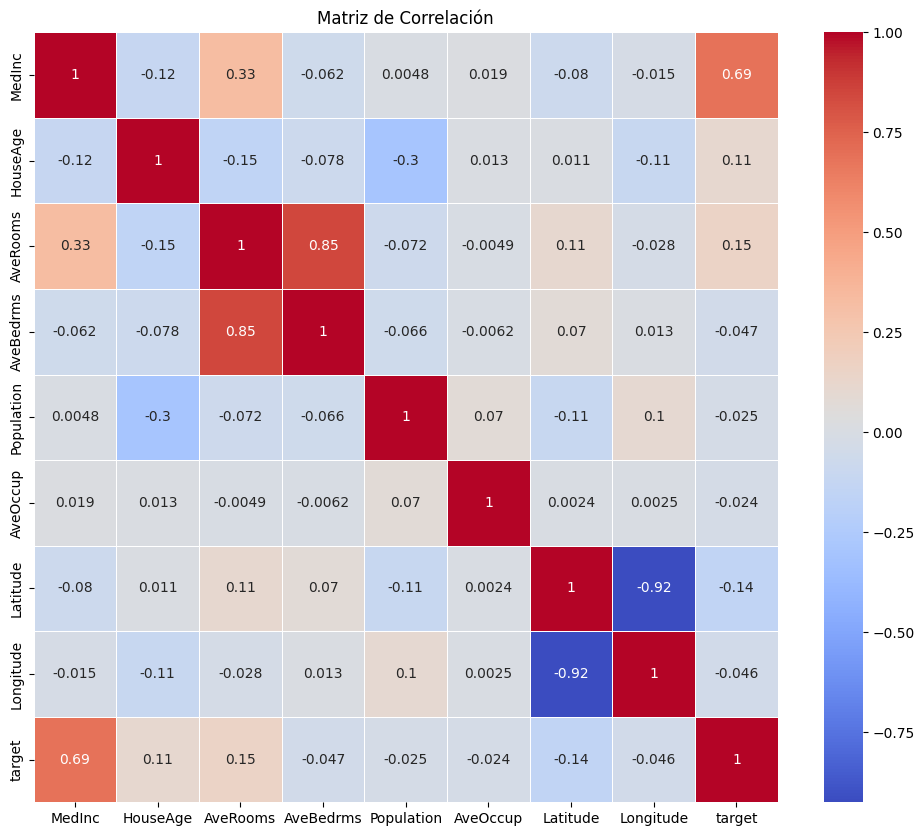

In [6]:
# Matriz de correlación

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación');

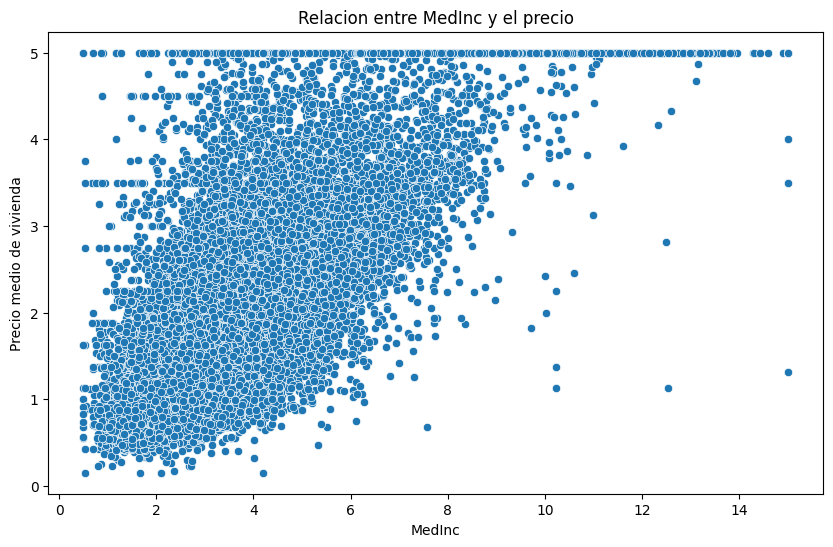

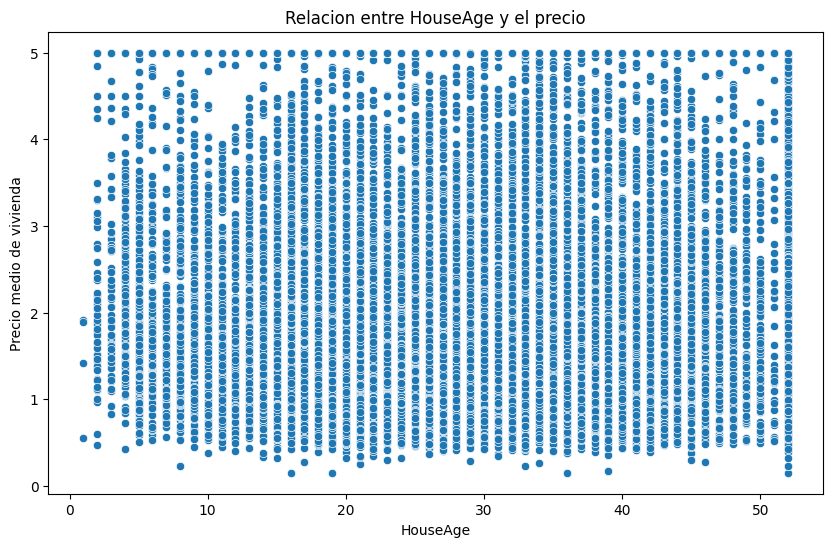

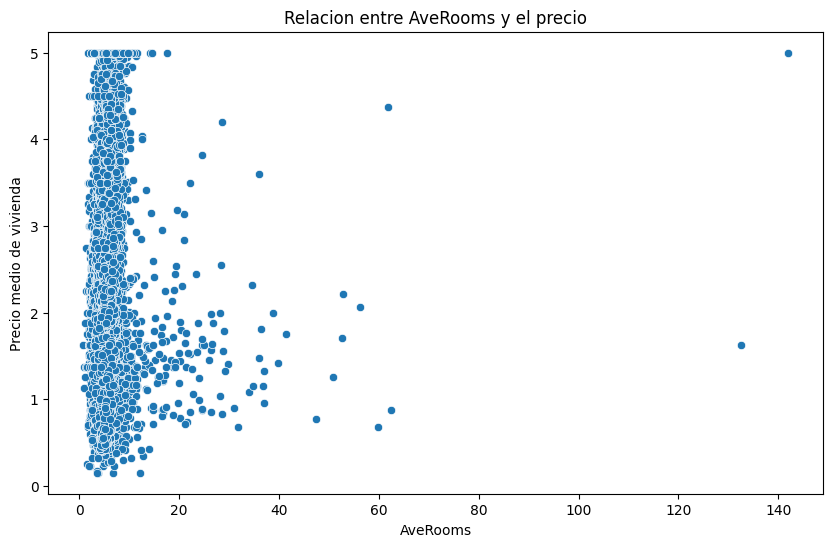

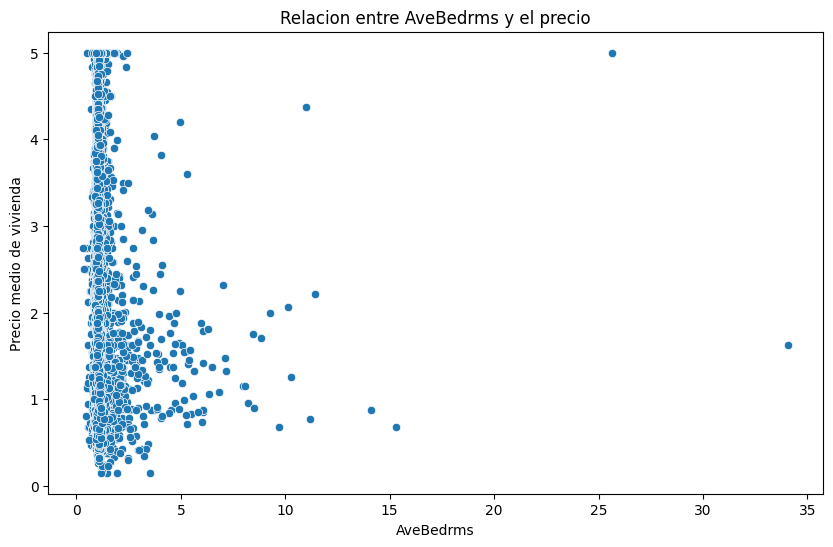

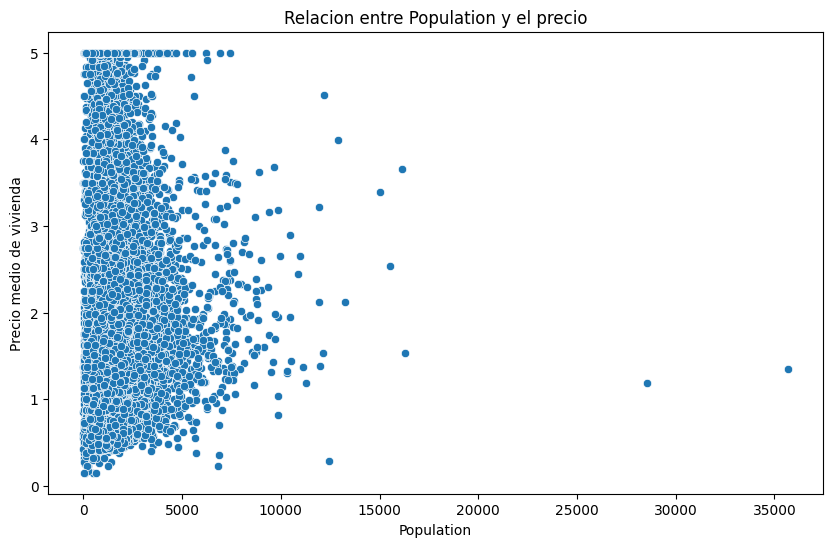

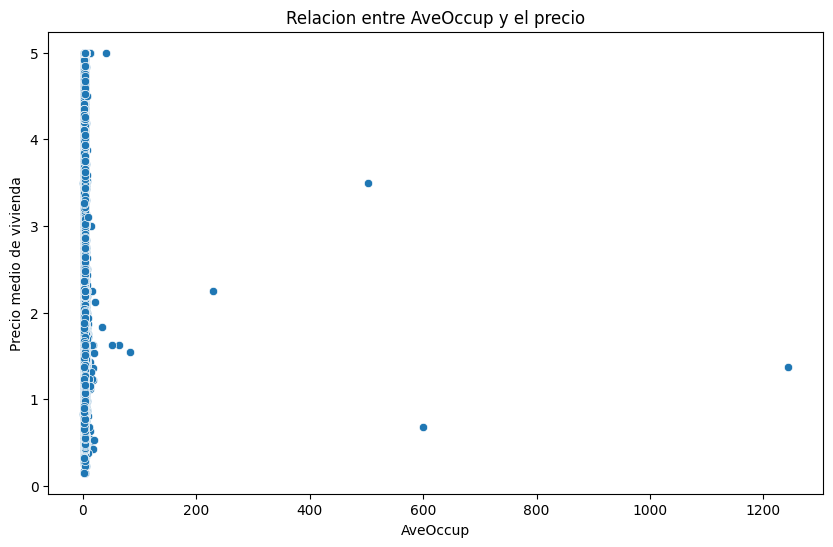

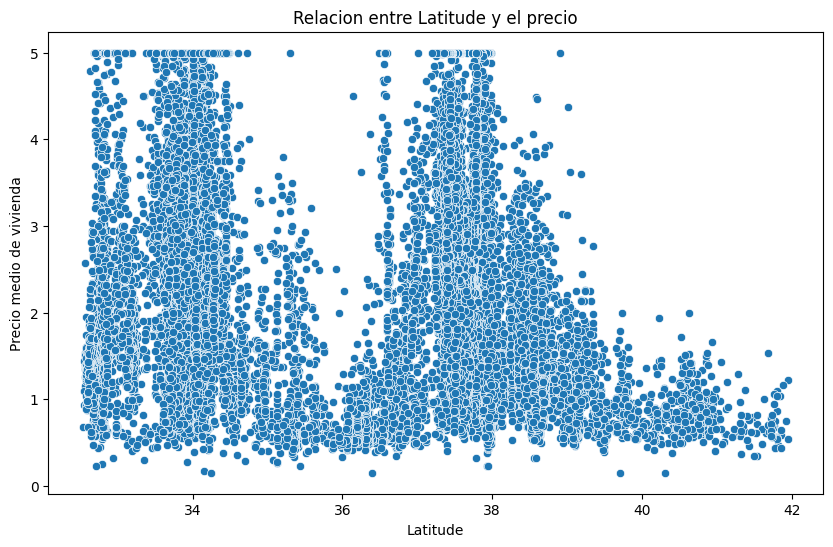

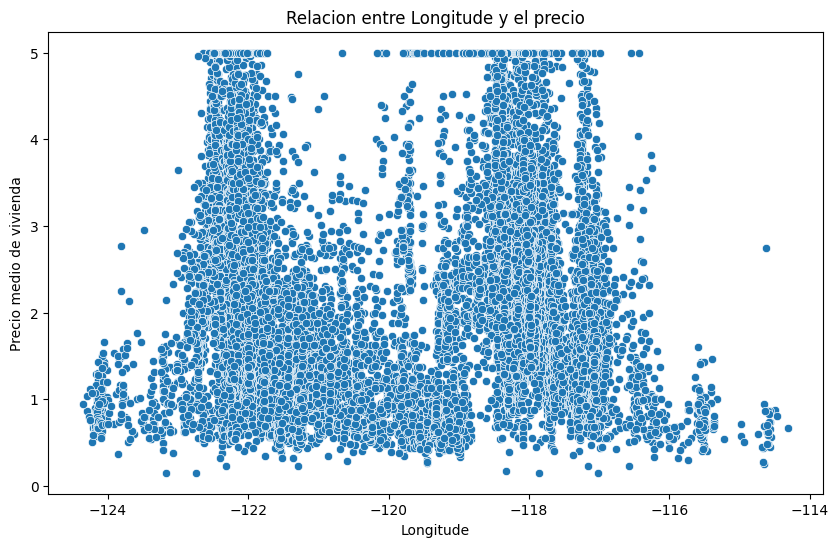

In [7]:
# Visualizaciones de relaciones entre feature y target

for feature in features_names:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df[feature], y=df['target'])
    plt.title(f'Relacion entre {feature} y el precio')
    plt.xlabel(feature)
    plt.ylabel('Precio medio de vivienda')

## Preprocesado de los datos

In [8]:
# Division de datos entre train y test
# No hacemos validacion ya que las redes neuronales no necesita la validacion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Escalado de datos

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


## Red Neuronal
### Construir el Modelo

In [9]:
# Construir el modelo

def construir_el_modelo(input_shape,learning_rate=0.001 ):
    model = keras.Sequential(
        [
            layers.Dense(128, activation='relu', input_shape=(input_shape,)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(16, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(1, activation='linear') # si es una regresion es linear
        ]
    )

    optimizador = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizador,
        loss='mse',
        metrics=['mae']
    )

    return model

In [10]:
model = construir_el_modelo(
    input_shape=X_train_scaled.shape[1]
)
model.summary()

c:\Users\denis\Desktop\Curso\Juan-Temario\DS102024_2025\3-MachineLearning\7-DeepLearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,993 (50.75 KB)

 Trainable params: 12,513 (48.88 KB)

 Non-trainable params: 480 (1.88 KB)

In [11]:
# collback de entrenamiento

early_stopping = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=30, #  si en 30 iteraciones no mejora para
        min_delta=0.001,
        restore_best_weights=True
        
    )
]
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    factor =0.2,
    patience=10,
    min_lr=0.00001,
    monitor='val_loss'
)


In [12]:
# entrenar el Modelo

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=300, # pero parrara si en 30 interaciones no varia
    batch_size=32, 
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.7634 - mae: 1.7390 - val_loss: 0.8297 - val_mae: 0.6116 - learning_rate: 0.0010
Epoch 2/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2287 - mae: 0.8355 - val_loss: 0.7302 - val_mae: 0.5180 - learning_rate: 0.0010
Epoch 3/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9027 - mae: 0.7189 - val_loss: 0.5860 - val_mae: 0.4979 - learning_rate: 0.0010
Epoch 4/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7533 - mae: 0.6405 - val_loss: 0.6053 - val_mae: 0.4817 - learning_rate: 0.0010
Epoch 5/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6391 - mae: 0.5896 - val_loss: 0.5923 - val_mae: 0.4651 - learning_rate: 0.0010
Epoch 6/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5846 - mae: 0.5650 - val_loss: 1.1201 - val_mae: 0.4577 - learning_rate: 0.0010
Epoch 7/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5694 - mae: 0.5539 - val_loss: 0.9302 - val_mae: 0.4566 - learning_rate: 0.0010

In [13]:
test_mse, test_mae=model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse:.4f}') # :.4f lo que sigue es una funcion y lo queremos con 4 decimas

print(f'Test MAE: {mae:.4f}')

print(f'Test R2: {R2:.4f}')

print(f'Test RMSE: {rmse*100_000:.4f}')

print(f'Test MAPE: {mape:.4f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step
Test MSE: 0.2960
Test MAE: 0.3759
Test R2: 0.7817
Test RMSE: 54408.0854
Test MAPE: 0.2216


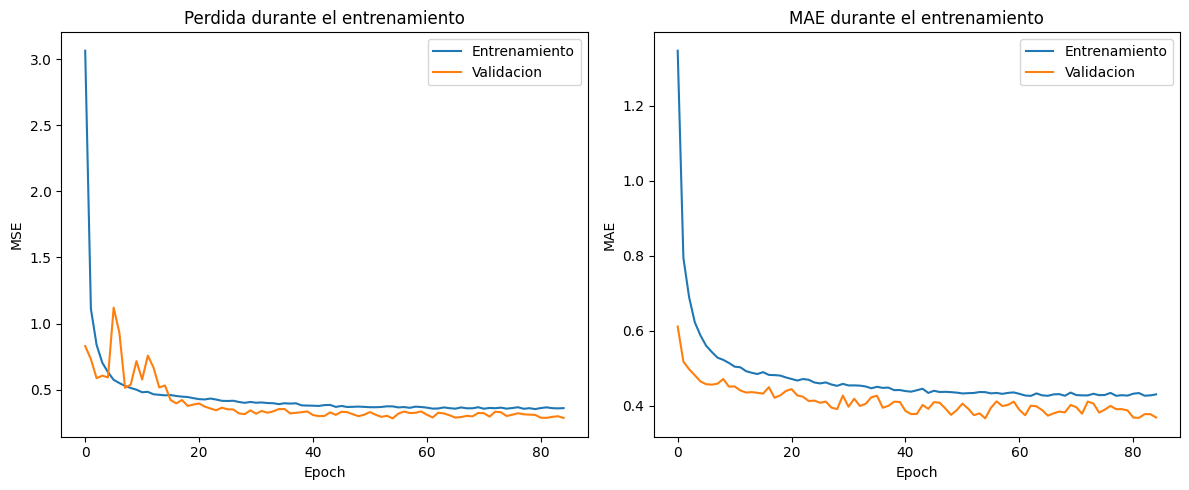

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Entrenamiento')# loss la perdida
plt.plot(history.history['val_loss'], label='Validacion')
plt.title('Perdida durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validacion')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend();

plt.tight_layout()
plt.show();


:arrow_up: no hay overfiti , ya que le pusimos que parara, si ubiera overfiti la lina azul bajaria a 0 y la naranja subiriapara ariba .

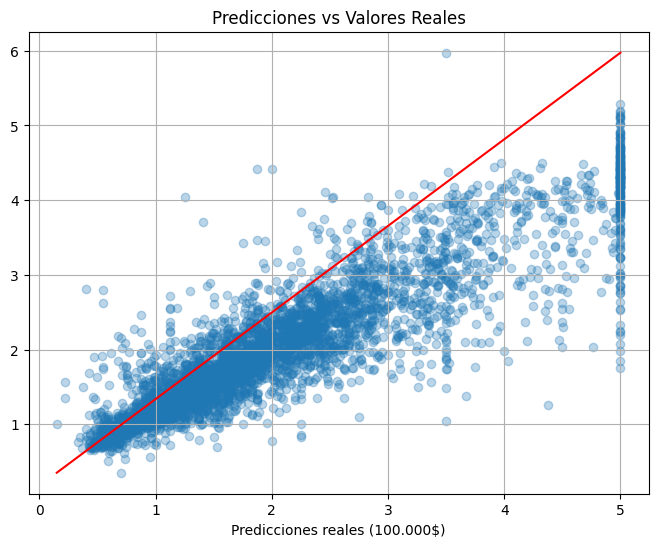

In [15]:
# veamos los residuos

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()], color='r')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Predicciones reales (100.000$)')
plt.grid(True)
plt.show();

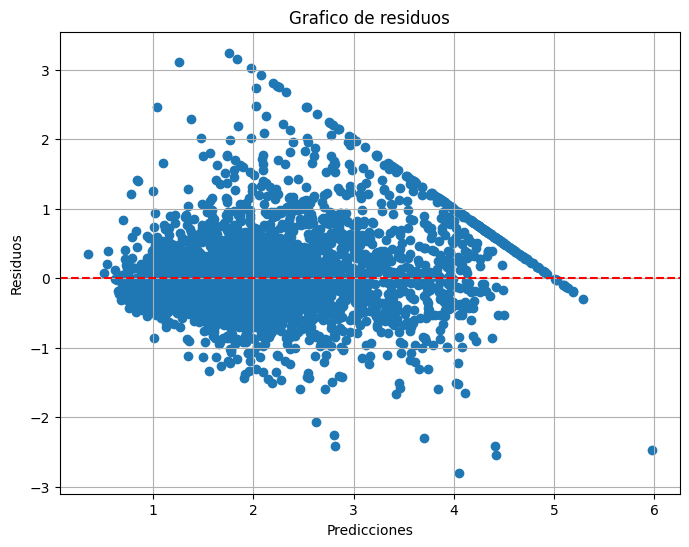

In [16]:
residuos = y_test - y_pred.flatten()

plt.figure(figsize=(8,6))

plt.scatter(y_pred, residuos)

plt.axhline(y=0, color='r', ls='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Grafico de residuos')

plt.grid(True)
plt.show();

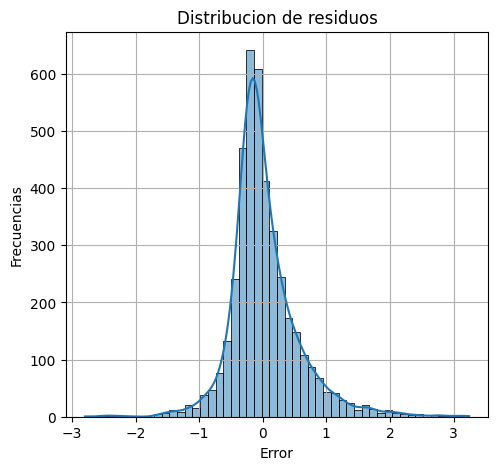

In [17]:
# distribuciones de errores

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=50)
plt.title('Distribucion de residuos')
plt.xlabel('Error')
plt.ylabel('Frecuencias')

plt.grid(True)
plt.show();

:arrow_up: Parece bastante normal, por tanto los residuos parecen bastante normales

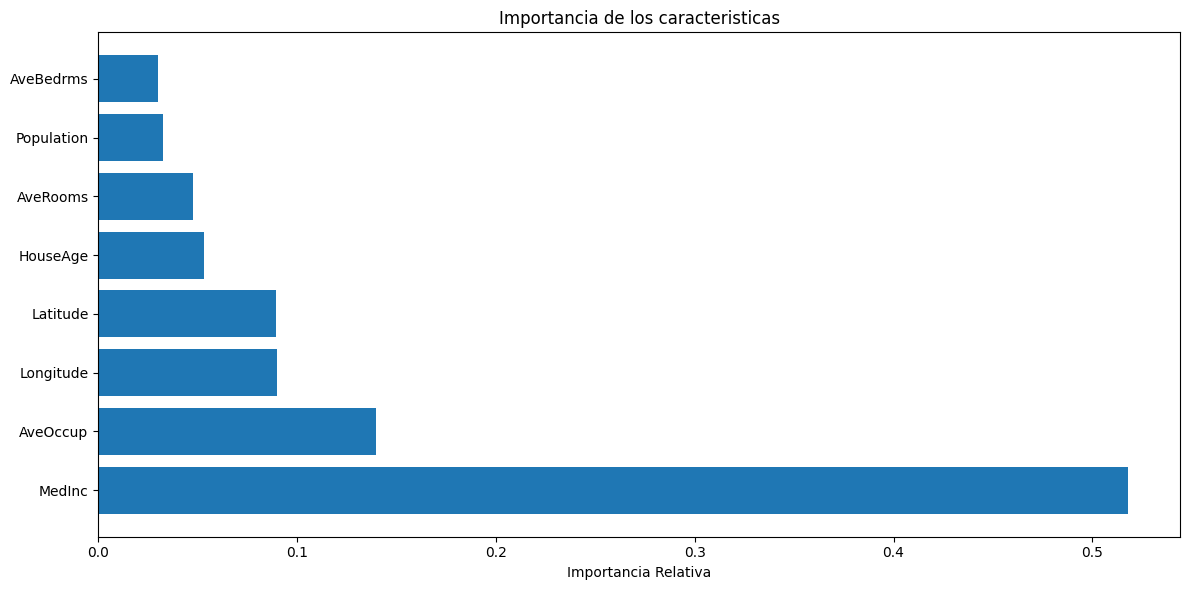

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=73)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.barh(range(len(indices)), importances[indices], align='center')

plt.yticks(range(len(indices)), [features_names[i] for i in indices])

plt.title('Importancia de los caracteristicas')
plt.xlabel('Importancia Relativa')

plt.tight_layout()

plt.show();

In [ ]:
# Ejemplo de implementación con Keras Tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

def build_model_tuner(hp):
    model = keras.Sequential()

    # Primera capa densa con número de unidades variable
    model.add(layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Capas ocultas adicionales (número variable)
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i+2}', min_value=16, max_value=128, step=16),
            activation='relu'
        ))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(hp.Float(f'dropout_{i+2}', min_value=0.1, max_value=0.5, step=0.1)))

    # Capa de salida
    model.add(layers.Dense(1))

    # Compilar el modelo
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='mse',
        metrics=['mae']
    )

    return model

# Configurar la búsqueda
tuner = RandomSearch(
    build_model_tuner,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='housing_tuning',
    project_name='california_housing'
)

# Ejecutar la búsqueda
tuner.search(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
)

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejores hiperparámetros: {best_hyperparameters.values}")